In [1]:
import pandas as pd
from pathlib import Path
import regex as re
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
path = Path('../../../data/NER/raw/characters/you_anime_refs.csv/')
path2 = Path('../../../data/NER/raw/characters/you_anime_characters_refs.csv/')

In [3]:
df = pd.read_csv(path, sep='\t')

In [4]:
df.head()

,title,link,img_addr
0,Атака титанов,/watch/vtorzhenie-gigantov,/anime-images/posters/128.jpg
1,Токийский гуль,/watch/tokiiskii-gul,/anime-images/posters/504.jpg
2,Бездомный бог,/watch/bezdomnyi-bog,/anime-images/posters/2827.jpg
3,Твоё имя,/watch/tvoe-imya,/anime-images/posters/5674.jpg
4,Тетрадь смерти,/watch/tetrad-smerti,/anime-images/posters/5599.jpg


In [5]:
df2 = pd.read_csv(path2, sep='\t')

In [6]:
df2.head()

,page_link,name,link,img_addr
0,https://you-anime.ru/characters/anime/vtorzhen...,Эрен Йегер,/characters/eren-ieger,/anime-images/characters/40882.jpg
1,https://you-anime.ru/characters/anime/vtorzhen...,Микаса Аккерман,/characters/mikasa-akkerman,/anime-images/characters/40881.jpg
2,https://you-anime.ru/characters/anime/vtorzhen...,Армин Арлерт,/characters/armin-arlert,/anime-images/characters/46494.jpg
3,https://you-anime.ru/characters/anime/vtorzhen...,Леви,/characters/levi,/anime-images/characters/45627.jpg
4,https://you-anime.ru/characters/anime/vtorzhen...,Саша Блауз,/characters/sasha-blauz,/anime-images/characters/45887.jpg


In [7]:
len(df2['name'])

113311

In [8]:
df2.drop_duplicates(['name'])

,page_link,name,link,img_addr
0,https://you-anime.ru/characters/anime/vtorzhen...,Эрен Йегер,/characters/eren-ieger,/anime-images/characters/40882.jpg
1,https://you-anime.ru/characters/anime/vtorzhen...,Микаса Аккерман,/characters/mikasa-akkerman,/anime-images/characters/40881.jpg
2,https://you-anime.ru/characters/anime/vtorzhen...,Армин Арлерт,/characters/armin-arlert,/anime-images/characters/46494.jpg
3,https://you-anime.ru/characters/anime/vtorzhen...,Леви,/characters/levi,/anime-images/characters/45627.jpg
4,https://you-anime.ru/characters/anime/vtorzhen...,Саша Блауз,/characters/sasha-blauz,/anime-images/characters/45887.jpg
...,...,...,...,...
113295,https://you-anime.ru/characters/anime/mcdull-b...,McDull,/characters/mcdull,/anime-images/characters/95761.jpg
113296,https://you-anime.ru/characters/anime/mcdull-b...,McBing,/characters/mcbing,/anime-images/characters/95763.jpg
113297,https://you-anime.ru/characters/anime/hal-i-bons,Mochi,/characters/mochi,/anime-images/characters/15821.jpg
113298,https://you-anime.ru/characters/anime/shinjuku...,Shin-chan Shinjuku,/characters/shin-chan-shinjuku,/anime-images/characters/19346.jpg


In [9]:
names = []
for i in df2['name'].unique():
    for j in i.split(): 
        token = re.sub(r"[^А-Яа-я]", "", j)
        if token!='':
            names.append(token.lower())    

In [10]:
len(names)

98280

In [11]:
labels = [1]*len(names)

In [12]:
characters = pd.DataFrame({'token':names, 'label': labels})
characters.head()

,token,label
0,эрен,1
1,йегер,1
2,микаса,1
3,аккерман,1
4,армин,1


In [13]:
names = characters.token.value_counts()
names[names > 1]

мать        457
отец        367
юки         214
акира       171
фон         168
           ... 
рицка         2
твайф         2
ноин          2
тачиказэ      2
саносукэ      2
Name: token, Length: 11487, dtype: int64

In [14]:
characters = characters.drop_duplicates(['token'])
len(characters)

36368

<AxesSubplot:>

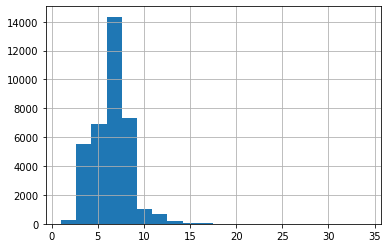

In [15]:
characters.token.apply(len).hist(bins=20)

In [16]:
book_path = Path('../../../data/NER/raw/books_text/')

In [24]:
book1 = book_path / 'priestuplieniie_i_nakazaniie_-_fiedor_mikhailovich_dostoievskii.txt'
book2 = book_path / 'voyna-i-mir-tom-1.txt'
book3 = book_path / 'txtrend_istochnik.txt'

In [26]:
with open(book1) as b1, open(book2) as b2, open(book3, encoding='utf-8') as b3:
    book1 = b1.read().split()
    book2 = b2.read().split()
    book3 = b3.read().split()
    book = book1 + book2 + book3 

In [27]:
import regex as re
doc = []
for token in book:
    tok = re.sub(r"[^А-Яа-я]", "", token)
    if tok!='':
        doc.append(tok.lower())

In [28]:
doc[:10]

['ф',
 'м',
 'достоевский',
 'преступление',
 'и',
 'наказание',
 'часть',
 'в',
 'начале',
 'июля']

In [29]:
labels = [0]*len(doc)
text = pd.DataFrame({'token':doc, 'label': labels})
text = text.drop_duplicates(subset=['token'], keep='first')
text = text.sample(frac=0.5)
len(text)

31370

<AxesSubplot:>

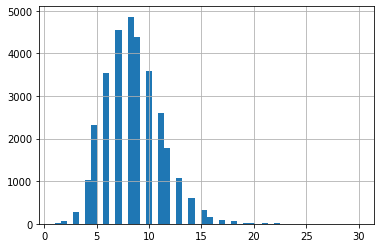

In [30]:
text.token.apply(len).hist(bins = 50)

In [31]:
raw_data = pd.concat([text, characters])
data = raw_data.sample(frac=1)
print(len(data))
print(len(characters), len(text))
data.head()

67738
36368 31370


,token,label
93281,случившееся,0
90435,шейд,1
56501,бессолини,1
355985,сможете,0
17142,такакура,1


In [32]:
names = data.token.value_counts()
names[names > 1]

рак         2
за          2
ба          2
женской     2
баре        2
           ..
кабака      2
черные      2
риски       2
чиновник    2
другая      2
Name: token, Length: 914, dtype: int64

In [33]:
data = data.drop_duplicates(subset=['token'])
len(data)

66824

<AxesSubplot:>

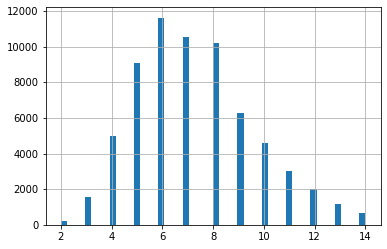

In [34]:
data[(data.token.str.len()<15) & (data.token.str.len()>1)].token.str.len().hist(bins=50)

In [35]:
data = data[(data.token.str.len()<15) & (data.token.str.len()>1)]

In [1]:
a = ord('а')
chars = [chr(i) for i in range(a,a+32)]
nums = [i+1 for i in range(0, 33)]
rus_dict = dict(zip(chars, nums))

In [37]:
max_len = len(max(data['token'], key=lambda i: len(i)))

In [38]:
max(data['token'], key=lambda i: len(i))

'отличительными'

In [39]:
def encode(word, max_len):
    cur_word = []
    for i in word:
        cur_word.append(rus_dict[i])
    while len(cur_word)<max_len:
        cur_word.append(1)
    return cur_word

In [40]:
data.head()

,token,label
93281,случившееся,0
90435,шейд,1
56501,бессолини,1
355985,сможете,0
17142,такакура,1


In [41]:
processed_data_root = '../../../data/NER/processed/'

In [42]:
data[['token', 'label']].to_csv(processed_data_root + 'tokens_labels_lstm.csv', index=False, sep=';')